## Figure W3 - The CNN Works

#### Enter filenames

In [1]:
figuredata_folder = '/Users/michaelstadler/Bioinformatics/Projects/rpb1/data/figuredata/W3-the-cnn-works'
matched_embedding_file = 'embeddings__real-nuclei-set3-matched-20220630__20220619-plussims-20220616-realreal.pkl'
#jitter_nclusters_embed_file = '/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings__jittered-rpb1-nclusters_TCtBnayZ__20220619-plussims-20220616-realreal.pkl'
jitter_nclusters_embed_file = '/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings__jittered-tflike_nclusters_xCTNnZNA__20220619-plussims-20220616-realreal.pkl'
jitter_nmols_mean_embed_file = '/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings__jittered-rpb1-cluster_nmols_mean_zgKFGbPn__20220619-plussims-20220616-realreal.pkl'
jitter_nmols_var_embed_file = '/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings__jittered-rpb1-cluster_nmols_var_NAlYXKEQ__20220619-plussims-20220616-realreal.pkl'
jitter_cluster_diam_embed_file = '/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings__jittered-rpb1-cluster_diam_mean_OqMQalxa__20220619-plussims-20220616-realreal.pkl'
jitter_hlb_nmols_embed_file = '/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/embeddings/embeddings__jittered-rpb1-hlb_nmols_jJmjDOpN__20220619-plussims-20220616-realreal.pkl'
filepath_tripletloss_png = '/Users/michaelstadler/Bioinformatics/Projects/rpb1/data/figuredata/W3-the-cnn-works/siamese-triplet.png'

#### Import libraries

In [2]:
from importlib import reload
import flymovie as fm
import cnn_models.evaluate_models as ev
from flymovie.simnuc import Sim
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
from importlib import reload
import umap
import scipy.ndimage as ndi
import skimage as ski
import matplotlib.image as mpimg
%load_ext autoreload
%autoreload 2

#### Set up files, define subplotting functions.

In [3]:
filepath_protein_separation = os.path.join(figuredata_folder, 'protein_separation.png')
filepath_zld_temp_prog = os.path.join(figuredata_folder, 'zld_temporal_progression.png')
filepath_rpb1_temp_prog = os.path.join(figuredata_folder, 'rpb1_temporal_progression.png')
purple_pill_png = os.path.join(figuredata_folder, 'purple-pill.png')
orange_pill_png = os.path.join(figuredata_folder, 'orange-pill.png')
green_pill_png = os.path.join(figuredata_folder, 'green-pill.png')
nclusters_png = os.path.join(figuredata_folder, 'nclusters.png')
nmols_mean_png = os.path.join(figuredata_folder, 'nmols_mean.png')
nmols_var_png = os.path.join(figuredata_folder, 'nmols_var.png')
cluster_diam_mean_png = os.path.join(figuredata_folder, 'cluster_diam_mean.png')
hlb_nmols_png = os.path.join(figuredata_folder, 'hlb_nmols.png')
output_file = os.path.join(figuredata_folder, 'figure-cnn-works.png')


######################################################################################
def plot_protein_separation(embed_pkl_file):
    embedding, names = fm.load_pickle(os.path.join(figuredata_folder, embed_pkl_file))
    reducer = umap.UMAP(n_components=2, target_n_neighbors=20)
    embedding_u = reducer.fit_transform(embedding)
    df = pd.DataFrame(embedding_u)
    df['names'] = names
    splits = df['names'].str.split('_', expand=True)
    df['sample'] = splits[0]
    df['stage'] = splits[1]
    for l in ['zld-wt', 'h2b', 'rpb1']:
        df_l = df.loc[df['sample'] == l]
        plt.scatter(df_l[0], df_l[1], edgecolors='white', linewidths=0.5)
    plt.xlabel('')
    plt.ylabel('')
    plt.legend(title='', loc='upper left', labels=['Zld', 'H2b', 'Rpb1'])
    plt.xticks([])
    plt.yticks([])
    return df


######################################################################################
def plot_temporal_progression(embed_pkl_file, sampleID, n_neighbors=15, min_dist=0.5):
    embedding, names = fm.load_pickle(os.path.join(figuredata_folder, embed_pkl_file))
    labels = pd.Series(names).str.split('_', expand=True)
    
    embedding = embedding[labels[0] == sampleID]
    labels = labels[labels[0] == sampleID]
    reducer = umap.UMAP(n_components=2, n_neighbors=n_neighbors, min_dist=min_dist)
    embedding_u = reducer.fit_transform(embedding)

    splits = labels[1].str.split('-', expand=True)
    splits.columns = ['sample', 'nc', 'mins']
    
    df = pd.DataFrame(embedding_u)
    df['nc'] = splits['nc'].values
    df['mins'] = splits['mins'].values.astype(int)

    ncs = df['nc'].unique()
    cmaps = ['Greens', 'Oranges', 'Purples']
    for i in range(len(ncs)):
        nc = ncs[i]
        cmap = cmaps[i]
        df_nc = df.loc[df['nc'] == nc]
        sns.scatterplot(data=df_nc, x=0, y=1, hue='mins', palette=cmap, legend=False)
        plt.xlabel('')
        plt.ylabel('')
        plt.xticks([])
        plt.yticks([])


######################################################################################
def plot_param_jitter(jitter_file, bins_params, vmax):
    p, e, h, _, _ = ev.extract_jitteredparam_dists(jitter_file, bins_params=bins_params)
    plt.subplots(figsize=(8,4))
    plt.imshow((np.swapaxes(h[0],0,1) * 1000), origin='lower', extent=(h[1][0],h[1][-1],h[2][0],h[2][-1]), aspect='auto', vmax=vmax, cmap='magma')

#### Make subplots, save.

In [ ]:
plot_protein_separation(matched_embedding_file)
plt.tight_layout()
plt.savefig(os.path.join(figuredata_folder, 'protein_separation.png'), dpi=300)


In [ ]:
plot_temporal_progression(matched_embedding_file, 'zld-wt', n_neighbors=40, min_dist=0.5) 
plt.tight_layout()
plt.savefig(filepath_zld_temp_prog, dpi=300)


In [ ]:
plot_temporal_progression(matched_embedding_file, 'rpb1', min_dist=0.1)  
plt.tight_layout()
plt.savefig(filepath_rpb1_temp_prog, dpi=300)

In [ ]:
plot_temporal_progression(matched_embedding_file, 'h2b', min_dist=0.5)  
plt.tight_layout()
plt.savefig(os.path.join(figuredata_folder, 'h2b_temporal_progression.png'), dpi=300)

In [ ]:
plot_param_jitter(jitter_nmols_mean_embed_file, 29, 250)
plt.tight_layout()
plt.savefig(nmols_mean_png, dpi=300)

In [ ]:
plot_param_jitter(jitter_nmols_var_embed_file, 29, 350)
plt.tight_layout()
plt.savefig(nmols_var_png, dpi=300)

In [ ]:
plot_param_jitter(jitter_nclusters_embed_file, 29, 250)
plt.tight_layout()
plt.savefig(nclusters_png, dpi=300)

In [ ]:
plot_param_jitter(jitter_hlb_nmols_embed_file, 35, 350)
plt.tight_layout()
plt.savefig(hlb_nmols_png, dpi=300)

#### Assemble final figure.

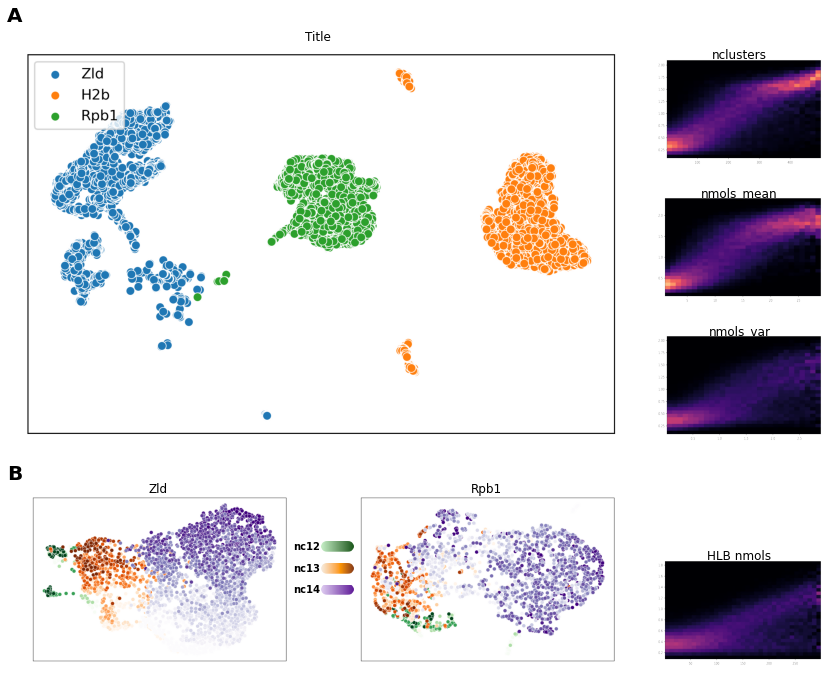

In [4]:
fig = plt.figure(constrained_layout=False, facecolor='1', figsize=(18,12))

plt.rcParams['axes.titley'] = 1.0    # y is in axes-relative coordinates.
plt.rcParams['axes.titlepad'] = -2

# Plot protein separation.
ax0 = fig.add_axes((0.02,0.47,0.48,0.48))
img = mpimg.imread(filepath_protein_separation)
ax0.imshow(img, aspect='auto')
ax0.set_title('Title')
ax0.axis('off')

# Plot Zelda temporal progression.
ax1 = fig.add_axes((0.0328,0.22,0.207,0.207))
img = mpimg.imread(filepath_zld_temp_prog)
ax1.imshow(img, aspect='auto')
ax1.set_title('Zld', size=12)
ax1.axis('off')

# Plot Rpb1 temporal progression.
ax2 = fig.add_axes((0.286,0.22,0.207,0.207))
img = mpimg.imread(filepath_rpb1_temp_prog)
ax2.imshow(img, aspect='auto')
ax2.set_title('Rpb1', size=12)
ax2.axis('off')


# Plot jittered nclusters.
ax = fig.add_axes((0.52,0.80,0.130,0.130))
img = mpimg.imread(nclusters_png)
ax.imshow(img, aspect='auto')
ax.set_title('nclusters', size=12)
ax.axis('off')

# Plot jittered nmols_mean.
ax = fig.add_axes((0.52,0.64,0.130,0.130))
img = mpimg.imread(nmols_mean_png)
ax.imshow(img, aspect='auto')
ax.set_title('nmols_mean', size=12)
ax.axis('off')

# Plot jittered nmols_var.
ax = fig.add_axes((0.52,0.48,0.130,0.130))
img = mpimg.imread(nmols_var_png)
ax.imshow(img, aspect='auto')
ax.set_title('nmols_var', size=12)
ax.axis('off')


# Plot jittered nmols_mean.
ax = fig.add_axes((0.52,0.22,0.130,0.130))
img = mpimg.imread(hlb_nmols_png)
ax.imshow(img, aspect='auto')
ax.set_title('HLB nmols', size=12)
ax.axis('off')
"""

# Plot jittered nmols_mean.
ax_jnc = fig.add_axes((0.32,0.02,0.225,0.225))
plot_param_jitter(jitter_nmols_mean_embed_file, ax_jnc, 29, 300)
ax_jnc.set_title('nmols_mean', size=12)

# Plot jittered nclusters.

ax_jnc = fig.add_axes((0.02,0.02,0.225,0.225))
plot_param_jitter(jitter_nclusters_embed_file, ax_jnc, 179, 300)
ax_jnc.set_title('nclusters', size=12)

"""

# Add stage/time legend.
ax3 = fig.add_axes((0.262,0.3,0.025,0.025))
img = mpimg.imread(purple_pill_png)
ax3.imshow(img, aspect='equal')
fig.text(0.241, 0.309, 'nc14')
ax3.axis('off')

ax4 = fig.add_axes((0.262,0.325,0.025,0.025))
img = mpimg.imread(orange_pill_png)
ax4.imshow(img, aspect='equal')
fig.text(0.241, 0.334, 'nc13')
ax4.axis('off')

ax4 = fig.add_axes((0.262,0.35,0.025,0.025))
img = mpimg.imread(green_pill_png)
ax4.imshow(img, aspect='equal')
fig.text(0.241, 0.359, 'nc12')
ax4.axis('off')


# Add Figure letter labels.
fig.text(0.02, 0.97,  'A', size=20)
fig.text(0.02, 0.44,  'B', size=20)
fig.savefig(output_file,dpi=600)


In [ ]:
12/8.48

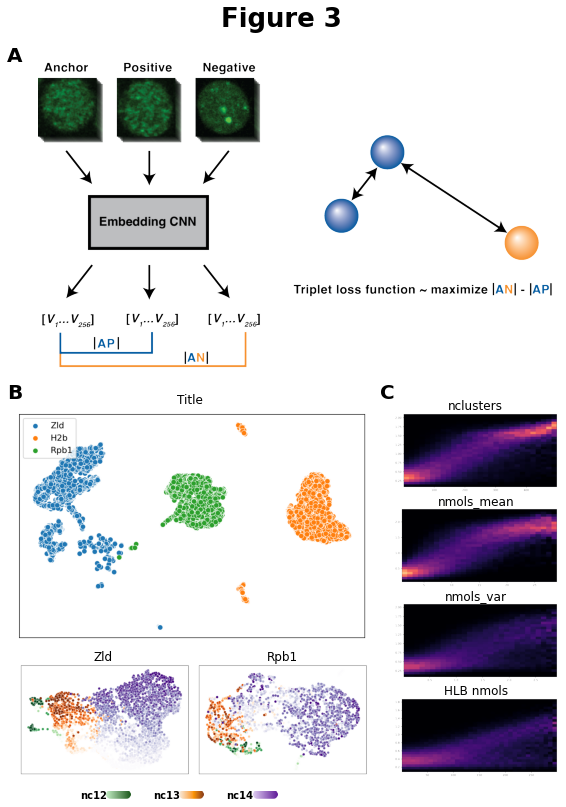

In [5]:
fig = plt.figure(constrained_layout=False, facecolor='1', figsize=(8.48,12))

plt.rcParams['axes.titley'] = 1.0    # y is in axes-relative coordinates.
plt.rcParams['axes.titlepad'] = 2

ax0 = fig.add_axes((0.07,0.44,0.85,0.85/1.41))
img = mpimg.imread(filepath_tripletloss_png)
ax0.imshow(img, aspect='equal')
ax0.axis('off')


# Plot protein separation.
ax0 = fig.add_axes((0.02,0.18,0.60,0.60*0.666))
img = mpimg.imread(filepath_protein_separation)
ax0.imshow(img, aspect='equal')
ax0.set_title('Title')
ax0.axis('off')

# Plot Zelda temporal progression.
ax1 = fig.add_axes((0.0328,0.06,0.29,0.29*0.66))
img = mpimg.imread(filepath_zld_temp_prog)
ax1.imshow(img, aspect='equal')
ax1.set_title('Zld', size=12)
ax1.axis('off')

# Plot Rpb1 temporal progression.
ax2 = fig.add_axes((0.325,0.06,0.29,0.29*0.66))
img = mpimg.imread(filepath_rpb1_temp_prog)
ax2.imshow(img, aspect='equal')
ax2.set_title('Rpb1', size=12)
ax2.axis('off')

# Plot jittered nclusters.
ax = fig.add_axes((0.65,0.375,0.275,0.275 *0.66))
img = mpimg.imread(nclusters_png)
ax.imshow(img, aspect='equal')
ax.set_title('nclusters', size=12)
ax.axis('off')

# Plot jittered nmols_mean.
ax = fig.add_axes((0.65,0.265,0.275,0.275 *0.66))
img = mpimg.imread(nmols_mean_png)
ax.imshow(img, aspect='equal')
ax.set_title('nmols_mean', size=12)
ax.axis('off')

# Plot jittered nmols_var.
ax = fig.add_axes((0.65,0.155,0.275,0.275 *0.66))
img = mpimg.imread(nmols_var_png)
ax.imshow(img, aspect='equal')
ax.set_title('nmols_var', size=12)
ax.axis('off')

# Plot jittered nmols_mean.
ax = fig.add_axes((0.65,0.045,0.275,0.275 *0.66))
img = mpimg.imread(hlb_nmols_png)
ax.imshow(img, aspect='equal')
ax.set_title('HLB nmols', size=12)
ax.axis('off')

# Add stage/time legend.
ax3 = fig.add_axes((0.182,0.05,0.04,0.04))
img = mpimg.imread(green_pill_png)
ax3.imshow(img, aspect='equal')
fig.text(0.139, 0.067, 'nc12', size=10)
ax3.axis('off')

# Add stage/time legend.
ax3 = fig.add_axes((0.302,0.05,0.04,0.04))
img = mpimg.imread(orange_pill_png)
ax3.imshow(img, aspect='equal')
fig.text(0.259, 0.067, 'nc13', size=10)
ax3.axis('off')

# Add stage/time legend.
ax3 = fig.add_axes((0.422,0.05,0.04,0.04))
img = mpimg.imread(purple_pill_png)
ax3.imshow(img, aspect='equal')
fig.text(0.379, 0.067, 'nc14', size=10)
ax3.axis('off')

fig.text(0.02, 0.92,  'A', size=20)
fig.text(0.02, 0.53,  'B', size=20)
fig.text(0.63, 0.53,  'C', size=20)

fig.text(0.37, 0.96,  'Figure 3', size=26)
#ax3.arrow(0, 0, 100, 100)

fig.savefig(output_file,dpi=800)
